# 1. Import libraries



In [203]:
import pandas as pd
import numpy as np
import missingno
from collections import Counter

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier

from sklearn.ensemble import VotingClassifier

# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# 2. Import and read data

Now import and read the 3 datasets as outlined in the introduction.

In [204]:
#Gia
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [205]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [206]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 3. Data description

Gia
The data provided is split into two groups:
1) The training set (train.csv)
2) The testing set (test.csv)

The training set includes a survival column which indicates whether or not the passenger survived. This data set is used to create the machine learning model.
The testing set is used to determine how well the model (generated from the training data set) performs on new unseen data. The testing data set does not provide the passengers' survival status. The model generated predicts the passengers' survival status.

The table below provides all the relevant information about the columns in the data sets:

| Column Name          | Description                                                | Key                    |
| ---------------------| ---------------------------------------------------------- | ---------------------- |
| __PassengerId__      | Passenger Identity                                         |                        | 
| __Survived__         | Passenger survival status                                  | 0 = No, 1 = Yes        | 
| __Pclass__           | Ticket class, a representation of socio-economic status (SES)| 1 = 1st class, 2 = 2nd class, 3 = 3rd class | 
| __Name__             | Passenger's name                                           |                        | 
| __Sex__              | Passenger's sex                                            |                        |
| __Age__              | Passengers age (in years)                                  |                        |
| __SibSp__            | Number of sibling and/or spouse travelling with passenger  |                        |
| __Parch__            | Number of parent and/or children travelling with passenger |                        |
| __Ticket__           | Ticket number                                              |                        |
| __Fare__             | Price of the ticket                                        |                        |
| __Cabin__            | Cabin number                                               |                        |
| __Embarked__         | Point of embarkation                                       | C = Cherbourg, Q = Queenstown, S = Southampton |

More information can be found under the [data](https://www.kaggle.com/c/titanic/

# 4. Exploratory Data Analysis (EDA)

Gia
Exploratory data analysis is used to gain insight on the data provided. This is achieved by using visualisation tools such as graphs and tables. It will allow us to understand the data and derive preliminary conclusions. Furthermore, it will summerise important trends, characteristics, and abnormalities in the dataset which will ultimately aid in training the model.

The following is explored and analysed:
- Data Types
- The shape of the data
- Missing values in the data
- Statistics derived from the data

## 4.1 Data types,data shapes, missing data and summary statistics

### 4.1.1.Data Types

In [207]:
# Non-null count and data types of the training
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Gia <font color='pink'>Observation:</font>  The training-set has 891 rows and 11 features + the __target variable (survived).__ 2 of the features are floats, 5 are integers and 5 are objects.

### 4.1.2.Data Shape

In [208]:
#Gia
print("The shape of the training data set: ", train.shape)
print("The shape of the testing data set: ", test.shape)

The shape of the training data set:  (891, 12)
The shape of the testing data set:  (418, 11)


Gia <font color='pink'>Observation:</font> The testing data set has one column less column than the training data set (the Survived column). As discussed above in section 3, survived is our response/target variable and will therefore be determined from the model derived from the training data.

### 4.1.3.Missing Values

In [209]:
#Gia
#Determine what percentage of data is missing values in each column of the training dataset
totalNumberOfDataPoints = train.isnull().sum().sort_values(ascending=False)
percentMissing = train.isnull().sum()/train.isnull().count()*100
percentMissingRounded = (round(percentMissing, 1)).sort_values(ascending=False)
missingData = pd.concat([totalNumberOfDataPoints, percentMissingRounded], axis=1, keys=['Total missing', '%'])
missingData.head(13)

,Total missing,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


In [210]:
#Gia
#Determine what percentage of data is missing values in each column of the testing dataset
totalNumberOfDataPoints = test.isnull().sum().sort_values(ascending=False)
percentMissing = test.isnull().sum()/test.isnull().count()*100
percentMissingRounded = (round(percentMissing, 1)).sort_values(ascending=False)
missingData = pd.concat([totalNumberOfDataPoints, percentMissingRounded], axis=1, keys=['Total missing', '%'])
missingData.head(13)

,Total missing,%
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2
PassengerId,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0


Gia <font color='pink'>Observation:</font> From the two tables above it can be seen that the training set has missing values in the Cabin, Age and Embarked columns. The testing dataset has missing values in the Cabin, Age and Fare columns. 
For the training dataset, the Embarked column only contains two missing values which can be easily dropped or filled. The Age column on the other hand has 177 missing values. We therefore, cannot drop the rows which have missing values in the age column as this will eliminate 20% of the training data. Therefore, these values need to be filled in. The approach taken to fill in the missing values is discussed below in section 5.2. Since the Cabin column is missing 77% of data points, we have decided to drop this column. 

### 4.1.4.Statistics

In [211]:
#Gia
# Summary of the statistics for the training data set 
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Gia
The table above gives an overview of the central tendencies of the numeric data in the testing dataset. <br /> <font color='pink'>Observations:</font> 
- 38% of people in the training dataset survived the Titanic 
- The passenger age ranges from 0.4 to 80 years old.
- There is an outlier in the Fare column because of the differences between the 75th percentile, standard deviation, and the max value (512). We will thus determine how to deal with this outlier by either dropping its corresponding row or filling the outlier with an appropriate value. 

## 4.2 Feature analysis

Gia
For feature analysis the training dataset will be split into two categories:
1) Categorical variables
2) Numerical variables

Categorical variables have values belonging to one of two or more categories. Numerical variables have a continuous distribution.
Identifying which variables are categorical and which variables are numerical will hel structure the data analysis properly. For example it makes no sense to determine the average of a categorical variable such as sex or class. Furthermore, sex, class and embarked have no intrinsic ordering to its value. 

### 4.2.1 Categorical variables

Gia
In this data set the categorical variables are:
1) Sex
2) Pclass 
3) Embarked.

#### 4.2.1.1.Categorical variable: Sex

In [212]:
#Gia
# Value counts of the sex column
train['Sex'].value_counts(dropna = False)

male      577
female    314
Name: Sex, dtype: int64

Gia <font color='pink'>Observation:</font> There are 263 more male passengers than female passengers in the training dataset. Therefore there is a high probability that this observation will also occur in the testing dataset

In [213]:
#Gia
# Mean of survival according to sex
train[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Probability by Sex')

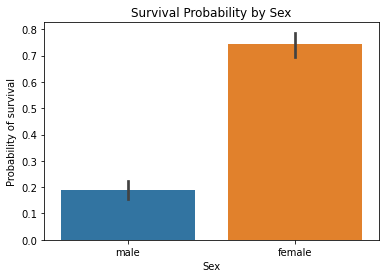

In [214]:
#Gia
# visualisation for the probability of survival according to sex
sns.barplot(x = 'Sex', y ='Survived', data = train)
plt.ylabel('Probability of survival')
plt.title('Survival Probability by Sex')

Gia <font color='pink'>Observation:</font> Female passengers are more likely to survive.

#### 4.2.1.2.Categorical variable: Pclass

In [215]:
#Gia
# Value counts of the Pclass column in the training dataset

train['Pclass'].value_counts(dropna = False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [216]:
#Gia
# Mean of survival by passenger class in the training dataset

train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


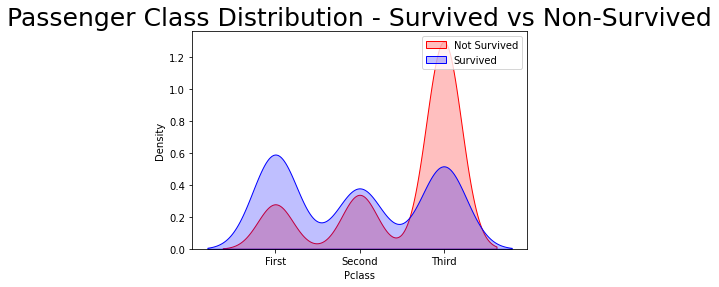

In [217]:
#Gia 
#Pclass distributions for survived and not survived
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Pclass'],shade=True,color='r',label='Not Survived')
ax.legend()
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'],shade=True,color='b',label='Survived')
ax.legend()

plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25)
labels = ['First', 'Second', 'Third']
plt.xticks(sorted(train.Pclass.unique()),labels);

Text(0.5, 1.0, 'Survival Probability by Passenger Class')

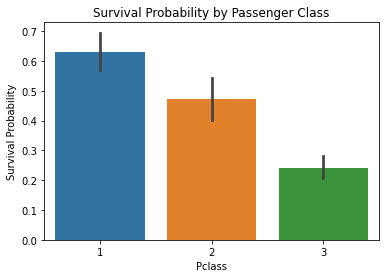

In [218]:
#Gia
sns.barplot(x = 'Pclass', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class')

<font color='pink'>Observation:</font> The probability of survival decreases with a decrease in passenger class. It can therefore be assumed that first class passengers were prioritised during the evacuation. Evidently, from the two graphs above, Pclass plays an important role in determining whether a passenger did or did not survive. According to the training dataset, 63% of the 1st class passengers survived, 48% of the 2nd class passengers survived and only 24% of the 3rd class passengers survived.

#### 4.2.1.3.Categorical variables combined: Sex and Plass

Text(0.5, 1.0, 'Survival Probability by Sex and Passenger Class')

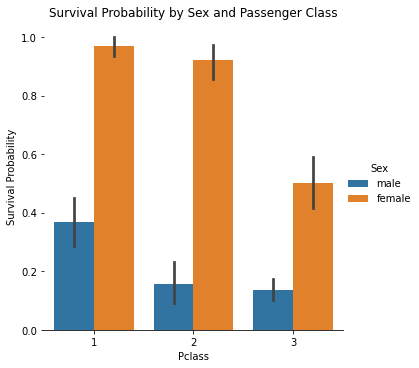

In [219]:
#Gia
# Survival by gender and passenger class
sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = train, kind = 'bar').despine(left = True)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class')

#Aiden did this
Gia <font color='pink'>Observation:</font>The graph above indicates that in every class, females where always more likely to survive

#### 4.2.1.4.Categorical variable: Embarked

In [220]:
# Value counts of the Embarked column 
#NAN is the missing values in Embarked
train['Embarked'].value_counts(dropna = False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [221]:
#Gia
# Mean of survival by point of embarkation
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival Probability by Point of Embarkation')

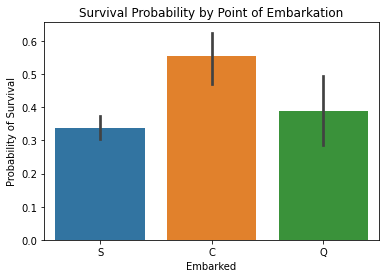

In [222]:
#Gia
#Visualisation for the probability of survival according to point of embarkation
sns.barplot(x = 'Embarked', y ='Survived', data = train)
plt.ylabel('Probability of Survival')
plt.title('Survival Probability by Point of Embarkation')

Gia <font color='pink'>Observation:</font> The probability of survival is highest for location C and lowest for location S.
Perhaps first class passengers embarked from location C and therefore because first class passengers had a higher chance of survival, location c also has the highest chance of survival. As an alternative perhaps third class passengers embarked from location S and because third class passengers had the lowest chance of survival , location S also has the lowest survival probability. This hypothesis is tested in section 4.2.1.5 below. 

#### 4.2.1.5.Categorical variable combined: Embarked and Class

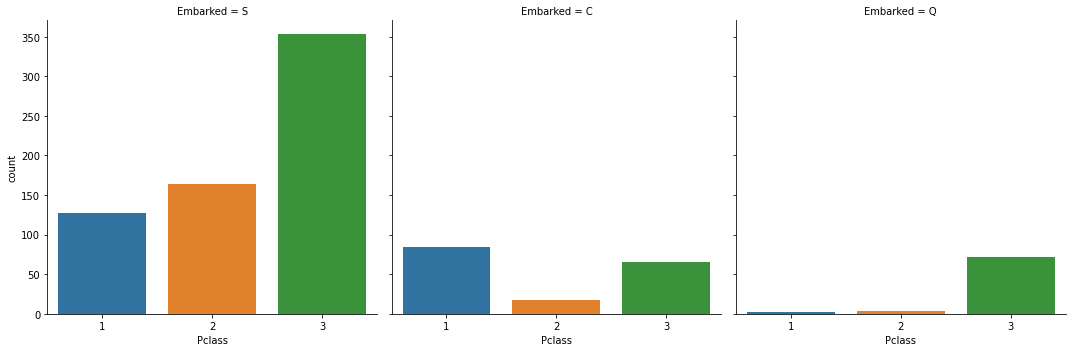

In [223]:
#Gia
# Visualisation for the relationship between class and embark 
sns.factorplot('Pclass', col = 'Embarked', data = train, kind = 'count')

<font color='pink'>Observation:</font> The hypothesis discussed in section 4.1.2.4 appears to be correct.  Location S has majority of the third class passengers

### 4.2.2 Numerical variables

Gia
In this dataset, the numerical variables are:
1) SibSp
2) Parch
3) Age
4) Fare

#### 4.2.2.1.Detect outliers in numerical variables

Gia Outliers are points in the dataset that don't conform with majority of the data (they are extreme values). Outliers need to be addressed as they tend to skew data and can cause inaccurate model predictions. The Tukey method is used to detect these outliers.

In [224]:
#Gia
#Function to predict outliers
def detect_outliers(df, n, features):
    """"
    This function loops through the list of features and detects outliers in each feature. A data point is considered to be 
    an outlier if it is less than Q1-1.5*IQR or if it is greater than Q3+1.5*IQR. Once the outliers have been determined for 
    a feature, their indices will be stored in a list and then the loop will proceed to the next feature. This process repeats
    until the last feature is complete. Finally, using the list with the indices of the outliers, the frequency of outliers is
    determined and if the frequency is greater than n then the list fill be returned.    
    """
    outlierIndices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlierStep = 1.5 * IQR 
        outlierList = df[(df[col] < Q1 - outlierStep) | (df[col] > Q3 + outlierStep)].index
        outlierIndices.extend(outlierList) 
    outlierIndices = Counter(outlierIndices)
    multipleOutliers = list(key for key, value in outlierIndices.items() if value > n) 
    return multipleOutliers

outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("The indices where outliers occur are {}: ".format(len(outliers_to_drop)), outliers_to_drop) 

The indices where outliers occur are 10:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [225]:
#Gia
# Outliers in numerical variables
#Visualise the 10 rows identified above as rows containing outliers
train.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


#### 4.2.2.2.Numerical variables correlation with survival

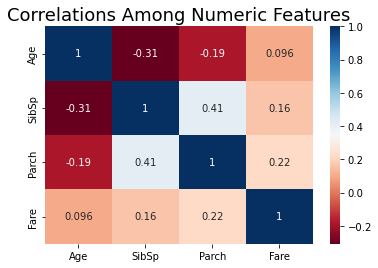

In [226]:
#Gia
#Heatmap of numerical variables
df_num = train[['Age','SibSp','Parch','Fare']]
sns.heatmap(df_num.corr(), annot=True,cmap="RdBu")
plt.title("Correlations Among Numeric Features", fontsize = 18);

Gia<font color='pink'>Observation:</font> The heatmap displayed above shows that Parch and SiSP often travel together.Therefore it will useful to create a isAlone and a family size feature.

#### 4.2.2.3.Numerical variable: SibSp

In [227]:
#Gia
# Value counts of the SibSp column 
train['SibSp'].value_counts(dropna = False)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [228]:
#Gia
# Mean of survival by SibSp
train[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Text(0.5, 1.0, 'Survival Probability by SibSp')

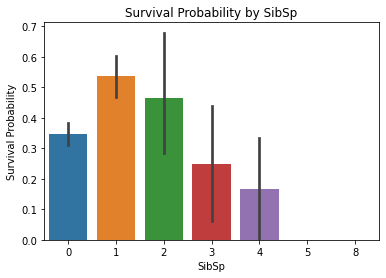

In [229]:
#Gia
#Visualisation for probability of survival according to SiSP 
sns.barplot(x = 'SibSp', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')

#### 4.2.2.4.Numerical variable: Parch

In [230]:
#Gia
# Value counts of the Parch column 
train['Parch'].value_counts(dropna = False)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [231]:
#Gia
# Mean of survival by Parch
train[['Parch', 'Survived']].groupby('Parch', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0.5, 1.0, 'Survival Probability by Parch')

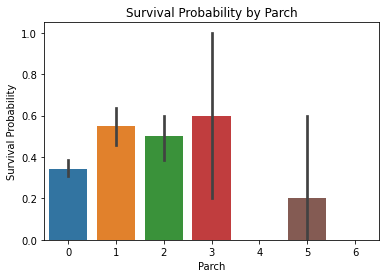

In [232]:
#Gia
#Visualisation for probability of survival according to Parch
sns.barplot(x = 'Parch', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')

#### 4.2.2.5.Numerical variable: Age

Text(0.5, 1.0, 'Passenger Age Distribution')

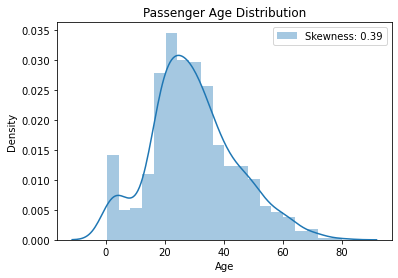

In [233]:
#Gia
# Passenger age distribution

sns.distplot(train['Age'], label = 'Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Age Distribution')

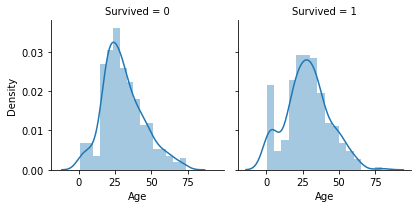

In [234]:
#Gia
# Age distribution by survival
sns.FacetGrid(train, col = 'Survived').map(sns.distplot, 'Age')

Text(0.5, 1.0, 'Passenger Age Distribution by Survival')

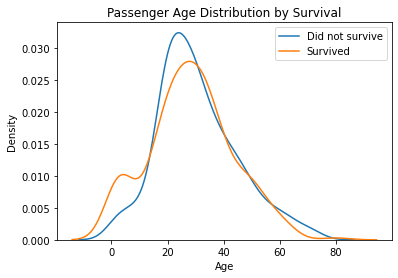

In [235]:
sns.kdeplot(train['Age'][train['Survived'] == 0], label = 'Did not survive')
sns.kdeplot(train['Age'][train['Survived'] == 1], label = 'Survived')
plt.xlabel('Age')
plt.legend()
plt.title('Passenger Age Distribution by Survival')

#### 4.2.2.6.Numerical variable: Fare

Text(0, 0.5, 'Passenger Fare Distribution')

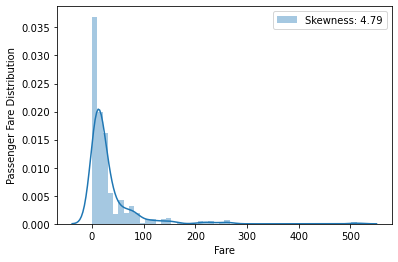

In [236]:
# Passenger fare distribution
sns.distplot(train['Fare'], label = 'Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Passenger Fare Distribution')

Gia <font color='pink'>Observation:</font> 

### 4.2.3 Correlation between categorical and numerical

#### 4.2.3.1.All variables

<AxesSubplot:>

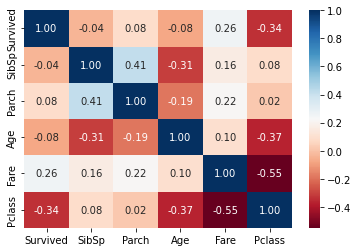

In [237]:
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare','Pclass']].corr(), annot = True, fmt = '.2f', cmap='RdBu')

Gia <font color='pink'>Observation:</font>  Fare appears to have a high correlation with survival.

# 5. Data preprocessing

Getting the dataset in a form to be modelled and trained. This includes:
- Dealing with ouliers
- Drop and fill missing values
- Data transformation 
- Feature engineering
- Feature encoding

## 5.1 Remove Outliers

In [238]:
# Drop outliers 

print("Train Set Before: {} rows".format(len(train)))
#train = train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("Train Set After: {} rows".format(len(train)))
print("Test Set Before: {} rows".format(len(test)))
# test = test.drop(outliers_to_drop_test, axis = 0).reset_index(drop = True)
print("Test Set After: {} rows".format(len(test)))

Train Set Before: 891 rows
Train Set After: 891 rows
Test Set Before: 418 rows
Test Set After: 418 rows


## 5.2 Drop and fill missing values

In [239]:
# Drop ticket and cabin features from training and test set as they are unique or missing many values
train = train.drop(['Ticket', 'Cabin'], axis = 1)
test = test.drop(['Ticket', 'Cabin'], axis = 1)

I have decided to drop both ticket and cabin for simplicity of this tutorial but if you have the time, I would recommend going through them and see if they can help improve your model.

In [240]:
train.isnull().sum().sort_values(ascending = False)

Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [241]:
# Fill missing value in Embarked with mode as only 3 values
mode = train['Embarked'].dropna().mode()[0]
train['Embarked'].fillna(mode, inplace = True)

In [242]:
test.isnull().sum().sort_values(ascending = False)

Age            86
Fare            1
PassengerId     0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
Embarked        0
dtype: int64

In [243]:
# Fill missing value for Fare 
median = test['Fare'].dropna().median()
test['Fare'].fillna(median, inplace = True)

In [244]:
# Check where indeces of missing ages are
age_nan_indices_train = list(train[train['Age'].isnull()].index)
len(age_nan_indices_train)
age_nan_indices_test = list(test[test['Age'].isnull()].index)


Age is negatively correlated with SibSp, Parch and Pclass as shown in section 4. Loop through each those rows and fill the missing age with their median. Othwerise fill with the Age median.

In [245]:
for index in age_nan_indices_train:
    median_age = train['Age'].median()
    predict_age = train['Age'][(train['SibSp'] == train.iloc[index]['SibSp']) 
                                 & (train['Parch'] == train.iloc[index]['Parch'])
                                 & (train['Pclass'] == train.iloc[index]["Pclass"])].median()
    if np.isnan(predict_age):
        train['Age'].iloc[index] = median_age
    else:
        train['Age'].iloc[index] = predict_age
combine = pd.concat([train, test], axis = 0).reset_index(drop = True)
median_age = combine['Age'].median()
for index in age_nan_indices_test:
    #use larger sample to fill test data 
    test['Age'].iloc[index] = median_age  

In [246]:
# Make sure there are no more missing ages 
print(train['Age'].isnull().sum())
test['Age'].isnull().sum()

0


0

## 5.3 Data transformation

Recall that our passenger fare column has a very high positive skewness. Therefore, we will apply a log transformation to address this issue.

Text(0.5, 1.0, 'Passenger Fare Distribution')

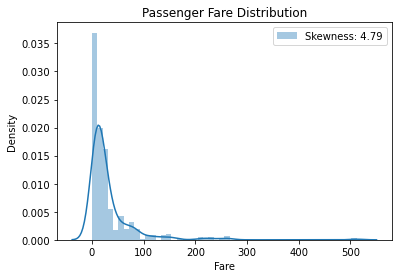

In [247]:
#  fare distribution

sns.distplot(train['Fare'], label = 'Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')

In [248]:
# In order to reduce skewness in fare, apply log transformation 
train['Fare'] = train['Fare'].map(lambda x: np.log(x) if x > 0 else 0)
test['Fare'] = test['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

Text(0.5, 1.0, 'Fare Distribution After Log Transformation')

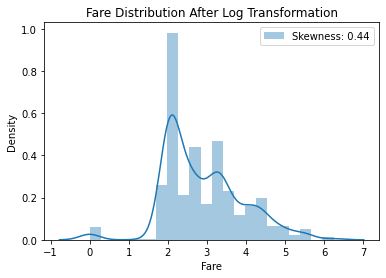

In [249]:
# After log transformation

sns.distplot(train['Fare'], label = 'Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Fare Distribution After Log Transformation')

## 5.4 Feature engineering

We create new features from existing features to obtain an improved model.

### 5.4.1 Title

In [250]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,1.981001,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,4.266662,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,2.070022,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,3.972177,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,2.085672,S


In [251]:
#Title from name column
train['Title'] = [name.split(',')[1].split('.')[0].strip() for name in train['Name']]
train[['Name', 'Title']].head()
test['Title'] = [name.split(',')[1].split('.')[0].strip() for name in test['Name']]
test[['Name', 'Title']].head()

,Name,Title
0,"Kelly, Mr. James",Mr
1,"Wilkes, Mrs. James (Ellen Needs)",Mrs
2,"Myles, Mr. Thomas Francis",Mr
3,"Wirz, Mr. Albert",Mr
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",Mrs


In [252]:
# Value counts of Title
train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [253]:
# visualise the testing titles
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [254]:
# Simplify Title as there are several unique itles that do not necessarily have a trend

train['Title'] = train['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess',
                                             'Sir'], 'Rare')
train['Title'] = train['Title'].replace(['Mlle', 'Ms'], 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

test['Title'] = test['Title'].replace(['Dr', 'Rev', 'Col',  'Capt', 'Dona'], 'Rare')
test['Title'] = test['Title'].replace(['Ms'], 'Miss')


In [255]:
# Drop name column as title has been extracted


train = train.drop('Name', axis = 1)
train.head()

test = test.drop('Name', axis = 1)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,male,34.5,0,0,2.057860,Q,Mr
1,893,3,female,47.0,1,0,1.945910,S,Mrs
2,894,2,male,62.0,0,0,2.270836,Q,Mr
3,895,3,male,27.0,0,0,2.159003,S,Mr
4,896,3,female,22.0,1,1,2.508582,S,Mrs


### 5.4.2 IsAlone

In [256]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train[['SibSp', 'Parch', 'FamilySize']].head()

test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
test[['SibSp', 'Parch', 'FamilySize']].head()

,SibSp,Parch,FamilySize
0,0,0,1
1,1,0,2
2,0,0,1
3,0,0,1
4,1,1,3


In [257]:
# Create IsAlone feature as familySize may have more information than we need, leading to overfitting

train['IsAlone'] = 0
train.loc[train['FamilySize'] == 1, 'IsAlone'] = 1

test['IsAlone'] = 0
test.loc[test['FamilySize'] == 1, 'IsAlone'] = 1

In [258]:
# Drop SibSp, Parch and FamilySize as this is contained in isAlone

train = train.drop(['SibSp', 'Parch','FamilySize'], axis = 1)
test = test.drop(['SibSp', 'Parch','FamilySize'], axis = 1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,male,22.0,1.981001,S,Mr,0
1,2,1,1,female,38.0,4.266662,C,Mrs,0
2,3,1,3,female,26.0,2.070022,S,Miss,1
3,4,1,1,female,35.0,3.972177,S,Mrs,0
4,5,0,3,male,35.0,2.085672,S,Mr,1


### 5.4.3 Age*Class

First convert Age into an ordinal variable. Group Ages into 5 age bands 

In [259]:

train['AgeBand'] = pd.cut(train['Age'], 5)
test['AgeBand'] = pd.cut(test['Age'], 5)

In [260]:
train.loc[train['Age'] <= 16.136, 'Age'] = 0
train.loc[(train['Age'] > 16.136) & (train['Age'] <= 32.102), 'Age'] = 1
train.loc[(train['Age'] > 32.102) & (train['Age'] <= 48.068), 'Age'] = 2
train.loc[(train['Age'] > 48.068) & (train['Age'] <= 64.034), 'Age'] = 3
train.loc[train['Age'] > 64.034 , 'Age'] = 4

test.loc[test['Age'] <= 16.136, 'Age'] = 0
test.loc[(test['Age'] > 16.136) & (test['Age'] <= 32.102), 'Age'] = 1
test.loc[(test['Age'] > 32.102) & (test['Age'] <= 48.068), 'Age'] = 2
test.loc[(test['Age'] > 48.068) & (test['Age'] <= 64.034), 'Age'] = 3
test.loc[test['Age'] > 64.034 , 'Age'] = 4

# Drop age band feature
train = train.drop('AgeBand', axis = 1)
test = test.drop('AgeBand', axis = 1)

In [261]:
# Convert ordinal Age into integer
train['Age'] = train['Age'].astype('int')
test['Age'] = test['Age'].astype('int')
train['Age'].dtype

dtype('int64')

In [262]:
# Create Age*Class

train['Age*Class'] = train['Age'] * train['Pclass']
test['Age*Class'] = test['Age'] * test['Pclass']
train[['Age', 'Pclass', 'Age*Class']].head()

,Age,Pclass,Age*Class
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


In [263]:
# Bin Fare 
train['FareBand'] = pd.qcut(train['Fare'], 4)
test['FareBand'] = pd.qcut(test['Fare'], 4)
train['FareBand'].head(10)


0    (-0.001, 2.068]
1     (3.434, 6.239]
2     (2.068, 2.671]
3     (3.434, 6.239]
4     (2.068, 2.671]
5     (2.068, 2.671]
6     (3.434, 6.239]
7     (2.671, 3.434]
8     (2.068, 2.671]
9     (2.671, 3.434]
Name: FareBand, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 2.068] < (2.068, 2.671] < (2.671, 3.434] < (3.434, 6.239]]

In [264]:
#ordinal encoding, simliar to age
train.loc[train['Fare'] <= 2.066, 'Fare'] = 0
train.loc[(train['Fare'] > 2.066) & (train['Fare'] <= 2.671), 'Fare'] = 1
train.loc[(train['Fare'] > 2.671) & (train['Fare'] <= 3.418), 'Fare'] = 2
train.loc[train['Fare'] > 3.418, 'Fare'] = 3

test.loc[test['Fare'] <= 2.066, 'Fare'] = 0
test.loc[(test['Fare'] > 2.066) & (test['Fare'] <= 2.671), 'Fare'] = 1
test.loc[(test['Fare'] > 2.671) & (test['Fare'] <= 3.418), 'Fare'] = 2
test.loc[test['Fare'] > 3.418, 'Fare'] = 3

In [265]:
train = train.drop([ 'FareBand'], axis = 1)
test = test.drop(['FareBand'], axis = 1)

In [266]:
# Convert Fare into integer
train['Fare'] = train['Fare'].astype('int')
test['Fare'] = test['Fare'].astype('int')

## 5.5 Feature encoding 

Variables must be numeric to use for machine learning. Age and Fare were done when Binning. 

In [267]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,1,0,3,male,1,0,S,Mr,0,3
1,2,1,1,female,2,3,C,Mrs,0,2
2,3,1,3,female,1,1,S,Miss,1,3
3,4,1,1,female,2,3,S,Mrs,0,2
4,5,0,3,male,2,1,S,Mr,1,6


In [268]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
label = LabelEncoder() 
train['Embarked'] = label.fit_transform(train['Embarked'])
test['Embarked'] = label.fit_transform(test['Embarked'])
train['Title'] = label.fit_transform(train['Title'])
test['Title'] = label.fit_transform(test['Title'])
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,1,0,3,0,1,0,2,2,0,3
1,2,1,1,1,2,3,0,3,0,2
2,3,1,3,1,1,1,2,1,1,3
3,4,1,1,1,2,3,2,3,0,2
4,5,0,3,0,2,1,2,2,1,6


In [269]:
train = train.drop('PassengerId', axis = 1)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,2,2,0,3
1,1,1,1,2,3,0,3,0,2
2,1,3,1,1,1,2,1,1,3
3,1,1,1,2,3,2,3,0,2
4,0,3,0,2,1,2,2,1,6


In [270]:
train['Survived'] = train['Survived'].astype('int')
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,2,2,0,3
1,1,1,1,2,3,0,3,0,2
2,1,3,1,1,1,2,1,1,3
3,1,1,1,2,3,2,3,0,2
4,0,3,0,2,1,2,2,1,6


In [271]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,1,2,1,6
1,893,3,1,2,0,2,3,0,6
2,894,2,0,3,1,1,2,1,6
3,895,3,0,1,1,2,2,1,3
4,896,3,1,1,1,2,3,0,3


# 6. Modelling

Scikit-learn is one of the most popular libraries for machine learning in Python and that is what we will use in the modelling part of this project. 

Since Titanic is a classfication problem, we will need to use classfication models, also known as classifiers, to train on our model to make predictions. I highly recommend checking out this scikit-learn [documentation](https://scikit-learn.org/stable/index.html) for more information on the different machine learning models available in their library. I have chosen the following classifiers for the job:

- Logistic regression
- Support vector machines
- K-nearest neighbours
- Gaussian naive bayes
- Perceptron
- Linear SVC
- Stochastic gradient descent
- Decision tree
- Random forest
- CatBoost

In this section of the notebook, I will fit the models to the training set as outlined above and evaluate their accuracy at making predictions. Once the best model is determined, I will also do hyperparameter tuning to further boost the performance of the best model.

## 6.1 Split training data

We need to first split our training data into independent variables or predictor variables, represented by X as well as  dependent variable or response variable, represented by Y.

Y_train is the survived column in our training set and X_train is the other columns in the training set excluding the Survived column. Our models will learn to classify survival, Y_train based on all X_train and make predictions on X_test.

In [272]:
X_train = train.drop('Survived', axis = 1)
Y_train = train['Survived']
X_test = test.drop('PassengerId', axis = 1).copy()#why only drop now
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (891, 8)
Y_train shape:  (891,)
X_test shape:  (418, 8)


## 6.2 Fit model to data and make predictions

This requires 3 simple steps: instantiate the model, fit the model to the training set and predict the data in test set. 

### 6.2.1 Logistic regression

 Explanation (not to be included in final submision): In section 6.2, we are training our models using the ENTIRE training set (every row that has a survive column). The models are UNTUNED.. We then calculate the accuracy of each model for the TRAINING set data. In other words we  determine how accurate each model is when it is asked to predict the outcome  (survival)  for the passengers on which it was trained. High scores might be an inidcation of which algorithms are likely to work well for predicting survival for passenges in the test set(this is the ultimate goal), although high scores could also indicate overfitting which is bad . These scores are summarised in the next section

In [273]:
#rael
logreg = LogisticRegression()
LGtrained=logreg.fit(X_train, Y_train)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)


### 6.2.2 Support vector machines

In [274]:
#rael
svc = SVC()
svc.fit(X_train, Y_train)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)


### 6.2.3 K-nearest neighbours (KNN)

In [275]:
#rael

knn = KNeighborsClassifier(n_neighbors = 5)
KNNtrained=knn.fit(X_train, Y_train)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

### 6.2.4 Gaussian naive bayes

In [276]:
#rael
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

### 6.2.5 Perceptron

In [277]:
#rael
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

### 6.2.6 Linear SVC

In [278]:
#rael
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

### 6.2.7 Stochastic gradient descent

In [279]:
#rael
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

### 6.2.8 Decision tree

In [280]:
#rael
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

### 6.2.9 Random forest

In [281]:
#rael
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

### 6.2.10 CatBoost

In [282]:
#rael
catboost = CatBoostClassifier()
catboost.fit(X_train, Y_train)
acc_catboost = round(catboost.score(X_train, Y_train) * 100, 2)

Learning rate set to 0.009807
0:	learn: 0.6869367	total: 1.28ms	remaining: 1.28s
1:	learn: 0.6805617	total: 1.9ms	remaining: 949ms
2:	learn: 0.6765313	total: 3.27ms	remaining: 1.09s
3:	learn: 0.6708693	total: 3.58ms	remaining: 893ms
4:	learn: 0.6643934	total: 3.89ms	remaining: 773ms
5:	learn: 0.6583571	total: 4.58ms	remaining: 759ms
6:	learn: 0.6523782	total: 5.26ms	remaining: 746ms
7:	learn: 0.6465669	total: 5.79ms	remaining: 718ms
8:	learn: 0.6430089	total: 6.22ms	remaining: 685ms
9:	learn: 0.6373309	total: 6.61ms	remaining: 654ms
10:	learn: 0.6318011	total: 7.13ms	remaining: 641ms
11:	learn: 0.6260813	total: 7.72ms	remaining: 636ms
12:	learn: 0.6209184	total: 10.2ms	remaining: 775ms
13:	learn: 0.6159589	total: 10.6ms	remaining: 750ms
14:	learn: 0.6111074	total: 11.2ms	remaining: 734ms
15:	learn: 0.6065857	total: 11.7ms	remaining: 721ms
16:	learn: 0.6029859	total: 12.1ms	remaining: 700ms
17:	learn: 0.5986634	total: 12.7ms	remaining: 691ms
18:	learn: 0.5940582	total: 13.2ms	remaining:

In [283]:
#rael
#MLP
mlp = MLPClassifier()
mlp.fit(X_train, Y_train)
acc_mlp = round(catboost.score(X_train, Y_train) * 100, 2)

In [284]:
#rael
#acc_catboost

## 6.3 Model evaluation and hyperparameter tuning

Once all our models have been trained, the next step is to assess the performance of these models and select the one which has the highest prediction accuracy. 

### 6.3.1 Training accuracy

Training accuracy shows how well our model has learned from the training set. 

Internal comment: Viewing and summarising the scores calcualted above for each algorithm. These models have have not yet been tuned

In [285]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                                 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 
                                 'Linear SVC', 'Decision Tree', 'CatBoost','MLP'],
                       'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron,
                                 acc_sgd, acc_linear_svc, acc_decision_tree, acc_catboost, acc_mlp]})

models.sort_values(by = 'Score', ascending = False, ignore_index = True)

,Model,Score
0,Random Forest,86.87
1,Decision Tree,86.87
2,CatBoost,86.76
3,MLP,86.76
4,KNN,84.06
5,Support Vector Machines,82.38
6,Logistic Regression,79.57
7,Linear SVC,79.24
8,Perceptron,76.21
9,Naive Bayes,76.09


### 6.3.2 K-fold cross validation

It is important to not get too carried away with models with impressive training accuracy as what we should focus on instead is the model's ability to predict out-of-samples data, in other words, data our model has not seen before.

This is where k-fold cross validation comes in. K-fold cross validation is a technique whereby a subset of our training set is kept aside and will act as holdout set for testing purposes. Here is a great [video](https://www.youtube.com/watch?v=fSytzGwwBVw) explaining the concept in more detail. 

In [286]:
# Create a list which contains classifiers 

classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(CatBoostClassifier())
classifiers.append(MLPClassifier())


len(classifiers)

11

In [287]:
# Create a list which contains cross validation results for each classifier

cv_results = []
for classifier in classifiers:#each result has 10 subcompoents for each section of the data that was made test if cv equals 10
    cv_results.append(cross_val_score(classifier, X_train, Y_train, scoring = 'accuracy', cv = 5))#try other cv's

Learning rate set to 0.008911
0:	learn: 0.6866555	total: 601us	remaining: 601ms
1:	learn: 0.6818562	total: 1.83ms	remaining: 915ms
2:	learn: 0.6760257	total: 2.41ms	remaining: 801ms
3:	learn: 0.6710320	total: 2.86ms	remaining: 712ms
4:	learn: 0.6669141	total: 3.28ms	remaining: 653ms
5:	learn: 0.6611452	total: 3.75ms	remaining: 622ms
6:	learn: 0.6557117	total: 4.28ms	remaining: 607ms
7:	learn: 0.6501780	total: 4.76ms	remaining: 590ms
8:	learn: 0.6444524	total: 5.21ms	remaining: 573ms
9:	learn: 0.6389021	total: 5.74ms	remaining: 568ms
10:	learn: 0.6335038	total: 6.18ms	remaining: 556ms
11:	learn: 0.6286847	total: 6.6ms	remaining: 543ms
12:	learn: 0.6238348	total: 7ms	remaining: 532ms
13:	learn: 0.6193011	total: 7.43ms	remaining: 523ms
14:	learn: 0.6144387	total: 7.88ms	remaining: 518ms
15:	learn: 0.6094980	total: 8.27ms	remaining: 509ms
16:	learn: 0.6054448	total: 8.84ms	remaining: 511ms
17:	learn: 0.6010429	total: 9.59ms	remaining: 523ms
18:	learn: 0.5981875	total: 10ms	remaining: 519ms

In [288]:
# Mean and standard deviation of cross validation results for each classifier  

cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [289]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gausian Naive Bayes', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest', 'CatBoost','MLP']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.818204,0.034429,Random Forest
1,0.815925,0.020326,Support Vector Machines
2,0.813728,0.029548,CatBoost
3,0.803616,0.024909,Decision Tree
4,0.801368,0.022425,MLP
5,0.783441,0.026689,KNN
6,0.783397,0.010840,Logistic Regression
7,0.783385,0.009889,Linear SVC
8,0.757661,0.041137,Gausian Naive Bayes
9,0.712667,0.069720,Perceptron


Text(0.5, 1.0, 'Cross Validation Scores')

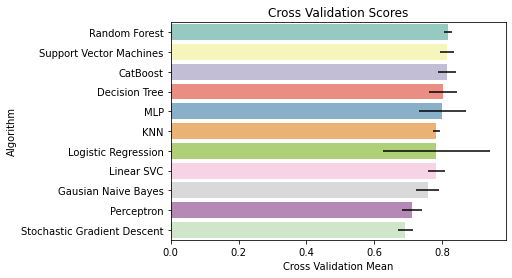

In [290]:
sns.barplot('Cross Validation Mean', 'Algorithm', data = cv_res, order = cv_res.sort_values(by = 'Cross Validation Mean', ascending = False)['Algorithm'], palette = 'Set3', **{'xerr': cv_std})
plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')

As we can see, support vector machines has the highest cross validation mean and thus we will proceed with this model.

### 6.3.3 Hyperparameter tuning for SVM

Hyperparameter tuning is the process of tuning the parameters of a model. Here I will tune the parameters of support vector classifier using GridSearchCV.

In [291]:
# param_grid = {'n_neighbors': [1,2,3,4,5,6],  
#              # 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
#              # 'kernel': ['rbf']}  
# }
# grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3) 

# grid.fit(X_train, Y_train) 

In [292]:
# param_grid = {'alpha': [0,1e-5,1e-4,1e-3,1e-2,1e-1,1],  
#              # 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
#              # 'kernel': ['rbf']}  
# }
# grid = GridSearchCV(MLPClassifier(), param_grid, refit = True, verbose = 3) 

# grid.fit(X_train, Y_train) 

In [293]:
# print("Best parameters: ", grid.best_params_) 
# print("Best estimator: ", grid.best_estimator_)# what is this

In [294]:
# Training accuracy

# #svc = KNeighborsClassifier(C = 100, gamma = 0.01, kernel = 'rbf')
# knn = KNeighborsClassifier(n_neighbors=6)
# knn.fit(X_train,Y_train)
# #svc.fit(X_train, Y_train)
# Y_pred = knn.predict(X_test)
# acc_svc = round(knn.score(X_train, Y_train) * 100, 2)
# acc_svc

In [295]:
# #svc = KNeighborsClassifier(C = 100, gamma = 0.01, kernel = 'rbf')
# mlp = grid.best_estimator_
# trainedAndTunedlMLP=mlp.fit(X_train,Y_train)
# #svc.fit(X_train, Y_train)
# Y_pred = mlp.predict(X_test)
# acc_svc = round(mlp.score(X_train, Y_train) * 100, 2)
# acc_svc

In [296]:
# # Mean cross validation score

# cross_val_score(mlp, X_train, Y_train, scoring = 'accuracy', cv = 5).mean()

Our mean cross validation score improved slightly.

In [297]:

std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

In [298]:
param_grid = {'alpha': [1e-5],  
              'hidden_layer_sizes': [(50,50,50),(3,), (50,190,3), (64,64,64) ],
              'activation': ['tanh','relu','logistic'],  
              'solver': ['sgd','adam'],
              'learning_rate': ['constant','adaptive']
}
grid = GridSearchCV(MLPClassifier(max_iter=2000), param_grid,n_jobs=-1, cv=5) 
grid.fit(X_train, Y_train) 

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=2000), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu', 'logistic'],
                         'alpha': [1e-05],
                         'hidden_layer_sizes': [(50, 50, 50), (3,),
                                                (50, 190, 3), (64, 64, 64)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [299]:
# Best paramete set
print('Best parameters found:\n', grid.best_params_)

# All results
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'relu', 'alpha': 1e-05, 'hidden_layer_sizes': (64, 64, 64), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.785 (+/-0.032) for {'activation': 'tanh', 'alpha': 1e-05, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.798 (+/-0.051) for {'activation': 'tanh', 'alpha': 1e-05, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.798 (+/-0.023) for {'activation': 'tanh', 'alpha': 1e-05, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.795 (+/-0.057) for {'activation': 'tanh', 'alpha': 1e-05, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.705 (+/-0.161) for {'activation': 'tanh', 'alpha': 1e-05, 'hidden_layer_sizes': (3,), 'learning_rate': 'constant', 'solver': 'sgd'}
0.788 (+/-0.066) for {'activation': 'tanh', 'alpha': 1e-05, 'hidden_layer_sizes': (3,), 'learning_rate': 'constant', 'solver': 'adam'}
0.749 (+/-0.134

In [300]:
# Survival predictions by support vector classifier

Y_pred = grid.predict(X_test).astype(int)

In [301]:
len(Y_pred)

418

### 6.3.4 Ensembles

In [302]:
# best_trained_MLP =trainedAndTunedlMLP #still not sure what this estimator is
# trained_knn = KNNtrained
# trained_lg = LGtrained


# voting_clf_soft = VotingClassifier(estimators = [('mlp',best_trained_MLP),('knn',trained_knn),('lg',trained_lg)], voting = 'soft') 



# print('voting_clf_soft :',cross_val_score(voting_clf_soft,X_train,Y_train,cv=5))
# print('voting_clf_soft mean :',cross_val_score(voting_clf_soft,X_train,Y_train,cv=5).mean())

# params = {'weights' : [[1,1,1],[1,2,1],[1,1,2],[2,1,1],[2,2,1],[1,2,2],[2,1,2]]}

# vote_weight = GridSearchCV(voting_clf_soft, param_grid = params, cv = 5, verbose = True, n_jobs = -1)
# best_clf_weight = vote_weight.fit(X_train, Y_train)
# voting_clf_sub = best_clf_weight.best_estimator_.predict(X_test)

# voting_clf_soft.fit(X_train, Y_train)
# Y_pred =  voting_clf_soft.predict(X_test).astype(int)

# 7. Preparing data for submission

In [303]:
# ss.head()

In [304]:
# ss.shape

We want our submission dataframe to have 418 rows and 2 columns, PassengerId and Survived. 

In [305]:
# Create submission dataframe

submit = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred})
submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [306]:
submit.shape

(418, 2)

Our dataframe is ready for submission!

In [307]:
# Create and save csv file 

submit.to_csv("submission.csv", index = False)

# 8. Possible extensions to improve model accuracy

1. Analyse ticket and cabin features
    - Do these features help predict passenger survival?
    - If yes, consider including them in the training set instead of dropping
2. Come up with alternative features in feature engineering
    - Is there any other features you can potentially create from existing features in the dataset
3. Remove features that are less important
    - Does removing features help reduce overfitting in the model?
4. Ensemble modelling
    - This is a more advanced technique whereby you combine prediction results from multiple machine learning models

# 9. Conclusion

You should achieve a submission score of 0.77511 if you follow exactly what I have done in this notebook. In other words, I have correctly predicted 77.5% of the test set. I highly encourage you to work through this project again and see if you can improve on this result.

If you found any mistakes in the notebook or places where I can potentially improve on, feel free to reach out to me. Let's help each other get better - happy learning!

My platforms: 
- [Facebook](https://www.facebook.com/chongjason914)
- [Instagram](https://www.instagram.com/chongjason914)
- [Twitter](https://www.twitter.com/chongjason914)
- [LinkedIn](https://www.linkedin.com/in/chongjason914)
- [YouTube](https://www.youtube.com/channel/UCQXiCnjatxiAKgWjoUlM-Xg?view_as=subscriber)
- [Medium](https://www.medium.com/@chongjason)

## References
https://github.com/chongjason914/kaggle-titanic 

https://www.kaggle.com/code/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy

https://github.com/murilogustineli/Titanic-Classification

https://www.kaggle.com/code/kenjee/titanic-project-example/notebook

